# Daily Births Forecasting

In [10]:
# import the necessary libraries
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot

Load the dataset

In [11]:
data = pd.read_csv('./data/daily-total-female-births-CA.csv',parse_dates=['date'],date_parser=pd.to_datetime)
data.columns =['ds','y']
data.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [12]:
data.isnull().any()

ds    False
y     False
dtype: bool

In [19]:
data.shape

(365, 2)

Visualize the data

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x =data['ds'],y=data['y'],mode='lines+markers'))

fig.show()

# Apply Fbprophet model

In [15]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False,
                          changepoint_range=0.9,
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(data)
future = m.make_future_dataframe(periods=50,freq='d')
future

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
410,1960-02-15
411,1960-02-16
412,1960-02-17
413,1960-02-18


In [17]:
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1959-01-01,34.694109,27.755536,44.356117,34.694109,34.694109,0.036578,0.036578,0.036578,0.023036,0.023036,0.023036,0.013542,0.013542,0.013542,0.0,0.0,0.0,35.963160
1,1959-01-02,34.735510,28.074289,44.138264,34.735510,34.735510,0.033261,0.033261,0.033261,0.000214,0.000214,0.000214,0.033046,0.033046,0.033046,0.0,0.0,0.0,35.890834
2,1959-01-03,34.776912,27.823334,44.132480,34.776912,34.776912,0.037283,0.037283,0.037283,-0.014597,-0.014597,-0.014597,0.051879,0.051879,0.051879,0.0,0.0,0.0,36.073482
3,1959-01-04,34.818313,26.407679,43.529755,34.818313,34.818313,-0.001755,-0.001755,-0.001755,-0.071527,-0.071527,-0.071527,0.069772,0.069772,0.069772,0.0,0.0,0.0,34.757218
4,1959-01-05,34.859714,29.510543,46.090548,34.859714,34.859714,0.069972,0.069972,0.069972,-0.016506,-0.016506,-0.016506,0.086478,0.086478,0.086478,0.0,0.0,0.0,37.298910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1960-02-15,51.754070,49.790865,66.832372,51.751312,51.756667,0.133051,0.133051,0.133051,-0.016506,-0.016506,-0.016506,0.149557,0.149557,0.149557,0.0,0.0,0.0,58.639977
411,1960-02-16,51.796255,53.137443,69.678287,51.793402,51.798987,0.187376,0.187376,0.187376,0.036741,0.036741,0.036741,0.150635,0.150635,0.150635,0.0,0.0,0.0,61.501652
412,1960-02-17,51.838440,54.243910,70.018899,51.835514,51.841236,0.193150,0.193150,0.193150,0.042639,0.042639,0.042639,0.150511,0.150511,0.150511,0.0,0.0,0.0,61.851052
413,1960-02-18,51.880625,52.229626,69.183976,51.877618,51.883483,0.172186,0.172186,0.172186,0.023036,0.023036,0.023036,0.149150,0.149150,0.149150,0.0,0.0,0.0,60.813723


visualize the seasonality effects we got after applying the model

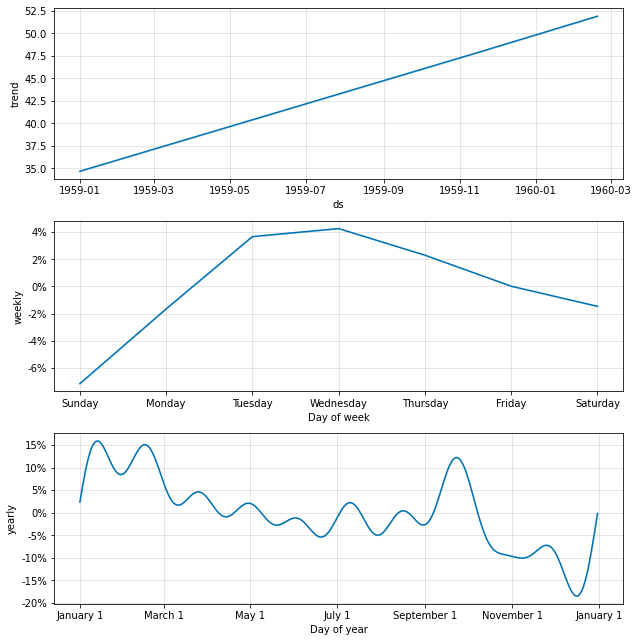

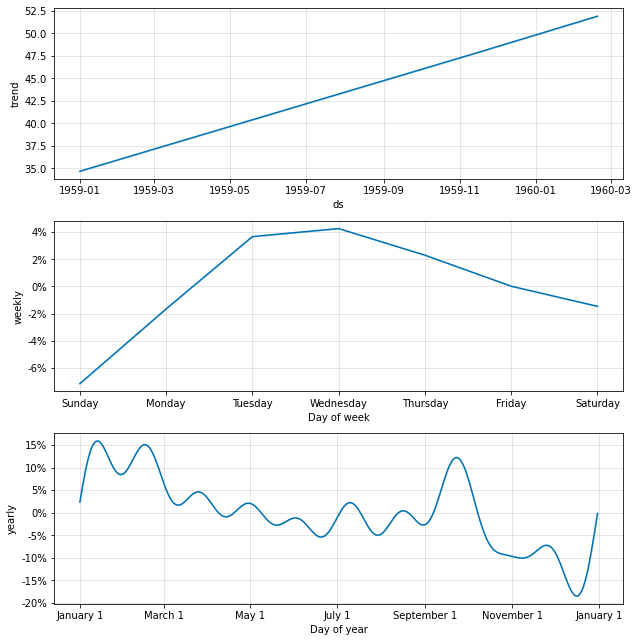

In [18]:
m.plot_components(forcast)

visualize the predictions made by the Facebook prophet model for daily births prediction

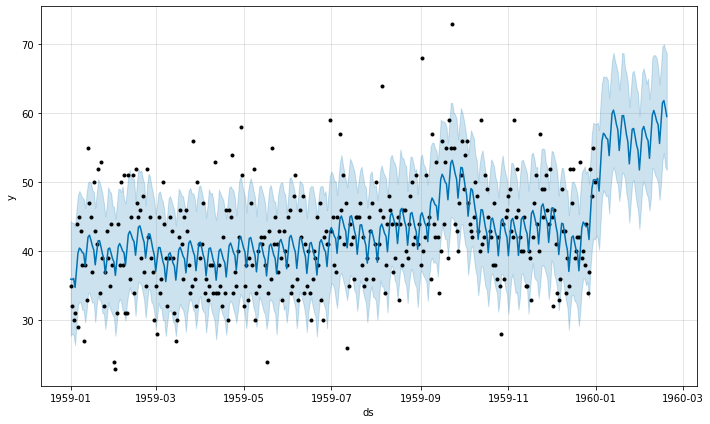

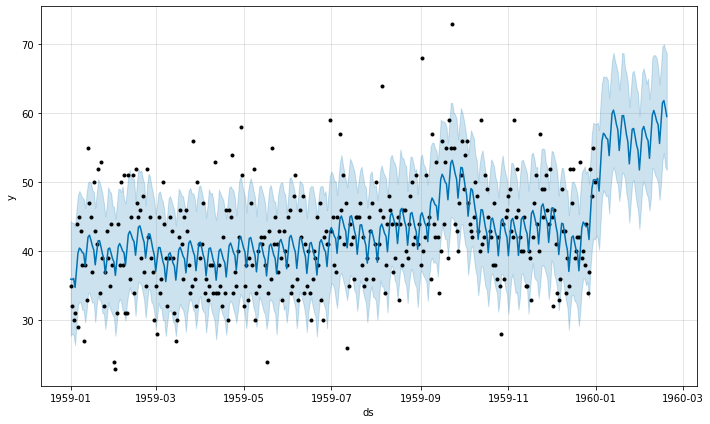

In [20]:
m.plot(forcast)

In [22]:
from fbprophet.plot import plot_plotly
#let's plot the forecast
plot_plotly(m, forcast)

***